In [2]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import random

In [36]:
x = load_boston().data[:, 5]
y = load_boston().target

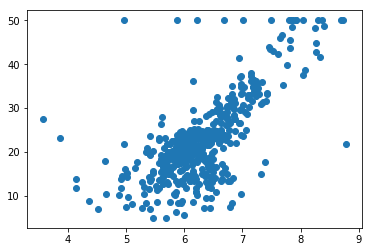

In [37]:
plt.Figure()
plt.scatter(x, y)

In [5]:
def prediction_price(k, b, x):
    return k * x + b

In [6]:
def loss(y, y_hat):
    loss_value = 0
    for i in range(len(y)):
        loss_value += (y[i] - y_hat[i])**2
    return loss_value / len(y)

In [7]:
def abs_loss(y, y_hat):
    loss_value = 0
    for i in range(len(y)):
        loss_value += abs((y[i] - y_hat[i]))
    return loss_value / len(y)

In [8]:
def loss_to_k_guidance(x, y, y_hat):
    k_guidance = 0
    n = len(x)
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        k_guidance += (y_i - y_hat_i) * x_i
    return  -2 / n * k_guidance


In [9]:
def loss_to_b_guidance(y, y_hat):
    g_guidance = 0
    n = len(y)
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        g_guidance += (y_i - y_hat_i)
    return -2 / n * g_guidance


In [10]:
def partial_k(x, y, y_hat):
    n = len(y)

    gradient = 0
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        gradient += (y_i - y_hat_i) * x_i
    
    return -2 / n * gradient


def partial_b(y, y_hat):
    n = len(y)

    gradient = 0
    
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        bgradient += (y_i - y_hat_i)
    
    return -2 / n * gradient

In [12]:
def gradient_descent(x, y, n=1000):
    current_k = random.random() * 200 - 100
    current_b = random.random() * 200 - 100 
    learn_rate = 0.001
    smaller_loss = float('inf')
    for i in range(n):
        y_hat = [prediction_price(current_k, current_b, x_i) for x_i in x]
        loss_value = loss(y, y_hat)
        if loss_value < smaller_loss: # performance became better
            smaller_loss = loss_value
            if i % 100 == 0:
                print('运行次数：{}, current_k: {}, current_b: {}, loss_vaule: {}'.format(i, current_k, current_b, smaller_loss))
        k_change = loss_to_k_guidance(x, y, y_hat)
        b_change = loss_to_b_guidance(y, y_hat)
        current_k = current_k + (-1 * k_change) * learn_rate
        current_b = current_b + (-1 * b_change) * learn_rate 

In [13]:
gradient_descent(x, y, 200)

运行次数：0, current_k: -26.42462593035941, current_b: -97.91529818761677, loss_vaule: 82757.57108673087
运行次数：100, current_k: 17.91806831901786, current_b: -90.80591119270386, loss_vaule: 82.42659065338266


In [14]:
y_hat = prediction_price(9.127657565435554, -34.76944885294249, x)

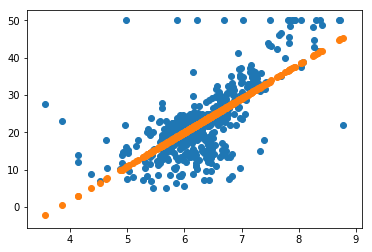

In [15]:
plt.Figure()
plt.scatter(x, y)
plt.scatter(x, y_hat)

# 观察绝对值损失产生的k，和b

In [81]:
k_and_b = []
def abs_get_k_and_b(times):
    current_k = random.random() * 200 - 100
    current_b = random.random() * 200 - 100
    direction = {0: (+1, +1), 
                 1: (+1, -1), 
                 2: (-1, +1), 
                 3: (-1, -1)}
    learn_rate = 10
    letter_loss = 0
    for asd in range(times):
        y_hat = [prediction_price(current_k, current_b, i) for i in x]
        loss_value = abs_loss(y, y_hat)
        if not letter_loss or letter_loss > loss_value :
            letter_loss = loss_value
            if not k_and_b:
                k_and_b.append(current_k)
                k_and_b.append(current_b)
            else:
                k_and_b[0] = current_k
                k_and_b[1] = current_b
            print(current_k, current_b,letter_loss)
            if asd == 0:
                direction_key = random.choice([0, 1, 2, 3])
                current_k += direction[direction_key][0] * learn_rate
                current_b += direction[direction_key][1] * learn_rate
        else:
            choice_key = [0, 1, 2, 3]
            choice_key.pop(direction_key)
            direction_key = random.choice(choice_key)
            current_k += direction[direction_key][0] * learn_rate
            current_b += direction[direction_key][1] * learn_rate
        
    

In [88]:
abs_get_k_and_b(10000)

89.44308756997427 -83.14899702614302 456.4353005029229
79.44308756997427 -73.14899702614302 403.5889566294051
69.44308756997427 -83.14899702614302 330.742612755887
69.44308756997427 -123.14899702614304 290.7426127558873
79.44308756997427 -253.14899702614304 223.58895662940492
69.44308756997427 -263.14899702614304 150.9851128030527
59.44308756997427 -273.14899702614304 79.16220854520184
59.44308756997427 -293.14899702614304 60.359469111562625
109.4430875699743 -663.148997026143 51.72425361128526
99.4430875699743 -613.148997026143 48.2901307698951
99.4430875699743 -593.148997026143 46.69094206729092
89.4430875699743 -543.148997026143 41.973538799729816
79.4430875699743 -493.148997026143 39.97829415593693
79.4430875699743 -473.148997026143 36.44502435349215
39.443087569974296 -253.14899702614298 30.2589035915473
49.443087569974296 -283.148997026143 21.514354127157965
39.443087569974296 -233.14899702614298 17.746946009100547


In [89]:
y_hat = [prediction_price(k_and_b[0], k_and_b[1], i) for i in x]

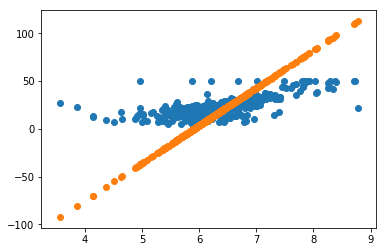

In [90]:
plt.Figure()
plt.scatter(x, y)
plt.scatter(x, y_hat)

In [91]:
def abs_derivative_k(y, k):
    return abs(k)

def abs_derivative_b(y, b):
    return abs(b)

In [101]:
def gradient_descent_abs(times):
    current_k = random.random() * 200 - 100
    current_b = random.random() * 200 - 100
    learn_rate = 10
    letter_loss = 0
    for asd in range(times):
        y_hat = [prediction_price(current_k, current_b, i) for i in x]
        loss_value = abs_loss(y, y_hat)
        if not letter_loss or letter_loss > loss_value :
            letter_loss = loss_value
            if not k_and_b:
                k_and_b.append(current_k)
                k_and_b.append(current_b)
            else:
                k_and_b[0] = current_k
                k_and_b[1] = current_b
            print(current_k, current_b,letter_loss, asd)
            if asd == 0:
                current_k += -1 * abs_derivative_k(y, current_k) * learn_rate
                current_b += -1 * abs_derivative_b(y, current_b) * learn_rate
        else:
            current_k += -1 * abs_derivative_k(y, current_k) * learn_rate
            current_b += -1 * abs_derivative_b(y, current_b) * learn_rate


In [102]:
gradient_descent_abs(1000)

16.460181881378205 4.177785901654801 85.09120465131834 0


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.


# Dynamic Programming

#### *给定一段钢筋度，根据不同长度的价格得出其最优价格，并得出其切分方式*

1.列出所有的切分组合方式

In [104]:
original_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30]

In [105]:
from collections import defaultdict

In [106]:
price = defaultdict(int)
for i, v in enumerate(original_price):
    price[i+1] = v

In [107]:
price

defaultdict(int,
            {1: 1,
             2: 5,
             3: 8,
             4: 9,
             5: 10,
             6: 17,
             7: 17,
             8: 20,
             9: 24,
             10: 30})

In [127]:
def all_split_type(n):
    splitTypeAndPrice = [(price[n], 0)]
    for i in range(1, n):
        splitTypeAndPrice.append((price[i] + price[n-i], i))
    return sorted(splitTypeAndPrice, key=lambda x: x[0], reverse=True)
        

In [129]:
print(all_split_type(30))

[(30, 10), (30, 20), (24, 9), (24, 21), (20, 8), (20, 22), (17, 6), (17, 7), (17, 23), (17, 24), (10, 5), (10, 25), (9, 4), (9, 26), (8, 3), (8, 27), (5, 2), (5, 28), (1, 1), (1, 29), (0, 0), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19)]


In [336]:
from functools import wraps
msg_times = defaultdict(int)
def get_times(func):
    @wraps(func)
    def warp(n):
        result = func(n)
        msg_times[(func.__name__, n)] += 1
        return result
    return warp

In [137]:
solution = {}  # n: (切分方式)
# @get_times
# @memo
def r(n):
    
    a = [(price[n], 0)]
    for i in range(1, n):
       a += [(r(i) + r(n-i), i)]
    
    max_price, max_split = max(a, key=lambda x: x[0])

    solution[n] = (n - max_split, max_split)
    print(a)
    return max_price

In [139]:
r(3)

[(1, 0)]
[(1, 0)]
[(1, 0)]
[(5, 0), (2, 1)]
[(1, 0)]
[(1, 0)]
[(5, 0), (2, 1)]
[(1, 0)]
[(8, 0), (6, 1), (6, 2)]


8

In [342]:
msg_times

defaultdict(int,
            {('r', 1): 58,
             ('r', 2): 56,
             ('r', 3): 54,
             ('r', 4): 52,
             ('r', 5): 50,
             ('r', 6): 48,
             ('r', 7): 46,
             ('r', 8): 44,
             ('r', 9): 42,
             ('r', 10): 40,
             ('r', 11): 38,
             ('r', 12): 36,
             ('r', 13): 34,
             ('r', 14): 32,
             ('r', 15): 30,
             ('r', 16): 28,
             ('r', 17): 26,
             ('r', 18): 24,
             ('r', 19): 22,
             ('r', 20): 20,
             ('r', 21): 18,
             ('r', 22): 16,
             ('r', 23): 14,
             ('r', 24): 12,
             ('r', 25): 10,
             ('r', 26): 8,
             ('r', 27): 6,
             ('r', 28): 4,
             ('r', 29): 2,
             ('r', 30): 1})

In [343]:
solution

{1: (1, 0),
 2: (2, 0),
 3: (3, 0),
 4: (2, 2),
 5: (3, 2),
 6: (6, 0),
 7: (6, 1),
 8: (6, 2),
 9: (6, 3),
 10: (10, 0),
 11: (10, 1),
 12: (10, 2),
 13: (10, 3),
 14: (12, 2),
 15: (13, 2),
 16: (10, 6),
 17: (16, 1),
 18: (16, 2),
 19: (16, 3),
 20: (10, 10),
 21: (20, 1),
 22: (20, 2),
 23: (20, 3),
 24: (22, 2),
 25: (23, 2),
 26: (20, 6),
 27: (26, 1),
 28: (26, 2),
 29: (26, 3),
 30: (20, 10)}

In [339]:
def parse_solution(n):
    left_split, right_split = solution[n]
    if right_split == 0:
        return [left_split]
    else:
        a = parse_solution(left_split) # [10]
        b = parse_solution(right_split)
        return a + b
    
    
    #  parse_solution(20)
        #  10
            # [10]

In [344]:
parse_solution(30)

[10, 10, 10]

In [340]:
already_computed = {}
def memo(func):
    @wraps(func)
    def wrap(n):
        if n not in already_computed:
            result = func(n)
            already_computed[n] = result
            return result
        else:
            return already_computed[n]
    return wrap
        